### 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 
#### The data contains the following fields:

* lat : Latitude
* lng:  Longitude
* desc: Description of the Emergency Call
* zip:  Zipcode
* title:Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)

### Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

### Import visualization libraries and set %matplotlib inline

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the 911.csv file as a dataframe

In [9]:
df = pd.read_excel('911.xlsx')

### Check the info() of the df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 6.8+ MB


### Check the head of df 

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


### Get the descriptive statistics of the df

In [12]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Answer the following questions:

#### What are the top 5 zipcodes for 911 calls?
##### Hint: Use value_counts()

In [19]:
df['zip'].value_counts().sort_values(ascending=False)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
19119.0       1
77316.0       1
19457.0       1
19107.0       1
19127.0       1
Name: zip, Length: 104, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?

In [23]:
df['twp'].value_counts(sort=True)

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Take a look at the 'title' column, how many unique title codes are there?
#### What are those titles?
##### Hint: use unique() and nunique()

In [25]:
df['title'].nunique()

110

110

In [26]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating new features

- In the titles column there are "Reasons/Departments" specified before the title code. 
- These are <b>EMS, Fire, and Traffic</b>. 
- Use .apply() with a custom lambda expression to create a new column called "Reason" that contains these string values. 
- For example, if the title column value is <b>EMS: BACK PAINS/INJURY</b> , the Reason column value would be <b>EMS</b>.
##### Hint: You can use split() function in the lambda expression.

In [28]:
df['Reason'] = df['title'].apply(lambda x: x[:x.find(':')])

In [30]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

,title
0,EMS: BACK PAINS/INJURY
1,EMS: DIABETIC EMERGENCY
2,Fire: GAS-ODOR/LEAK
3,EMS: CARDIAC EMERGENCY
4,EMS: DIZZINESS
...,...
99487,Traffic: VEHICLE ACCIDENT -
99488,Traffic: VEHICLE ACCIDENT -
99489,EMS: FALL VICTIM
99490,EMS: NAUSEA/VOMITING


In [12]:
df['title'][0]

'EMS: BACK PAINS/INJURY'

In [13]:
df['title'][0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [14]:
df['title'][0].split(':')[0]

'EMS'

,Reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


### What is the most common Reason for a 911 call based off of this new column? 

In [31]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Create a pie chart to see the percentage of each reason.

In [32]:
df['Reason'].value_counts().index

Index(['EMS', 'Traffic', 'Fire'], dtype='object')

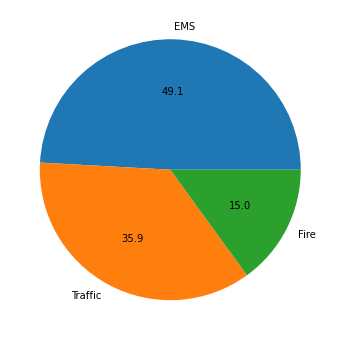

In [40]:
plt.figure(figsize=(8,6))
plt.pie(df['Reason'].value_counts().values, labels=df['Reason'].value_counts().index,autopct='%0.1f');

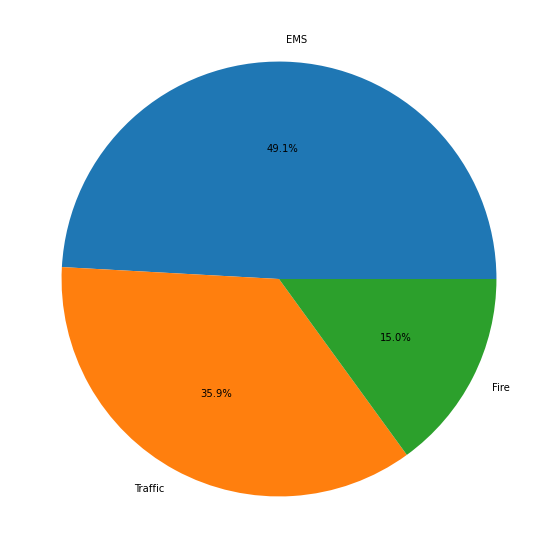

In [41]:
pd.DataFrame(df['Reason'].value_counts())

,Reason
EMS,48877
Traffic,35695
Fire,14920


,Reason
EMS,48877
Traffic,35695
Fire,14920


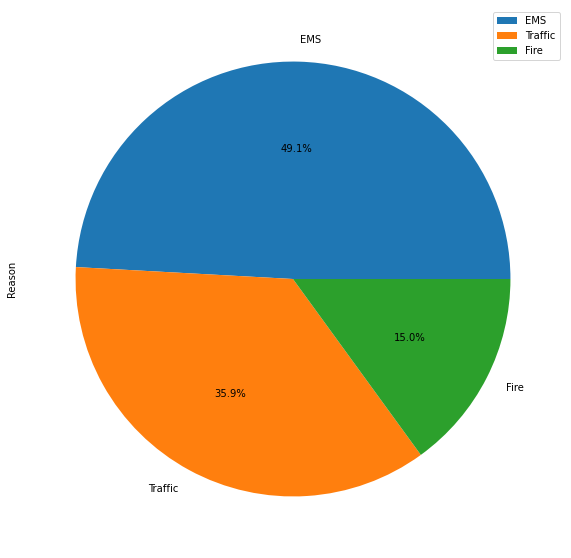

### Now use seaborn to create a countplot of 911 calls by Reason. 

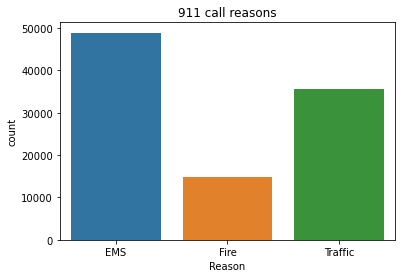

In [45]:
import seaborn as sns
sns.countplot(data=df, x='Reason')
plt.title('911 call reasons');

### Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  float64       
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 7.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [49]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [50]:
time.hour

17

In [51]:
time.month

12

In [52]:
time.day_of_week

3

### Create the following new columns:
- Now that the timestamp column are actually DateTime objects.
- use <b>.apply()</b> to create 3 new columns called Hour, Month, and Day of Week.
- You will create these columns based off of the timeStamp column.

In [54]:
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['month'] = df['timeStamp'].apply(lambda x:x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x:x.day_of_week)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  float64       
 9   Reason     99492 non-null  object        
 10  hour       99492 non-null  int64         
 11  month      99492 non-null  int64         
 12  dayofweek  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 9.9+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


In [56]:
df[['hour', 'month', 'dayofweek']]

,hour,month,dayofweek
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

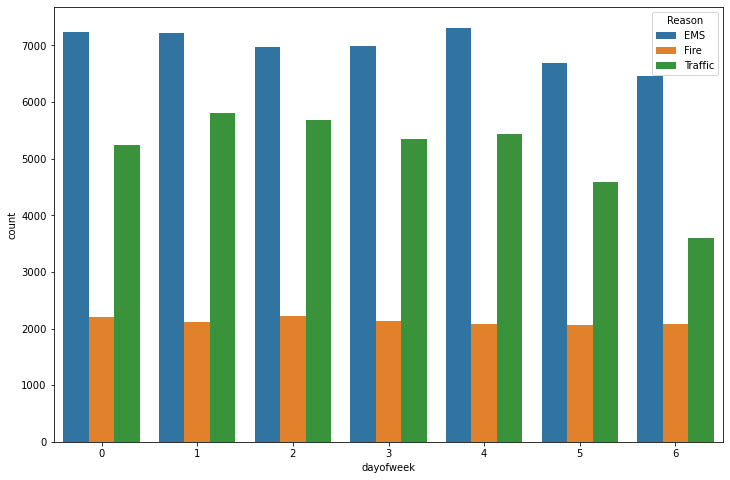

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='dayofweek', hue='Reason');

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

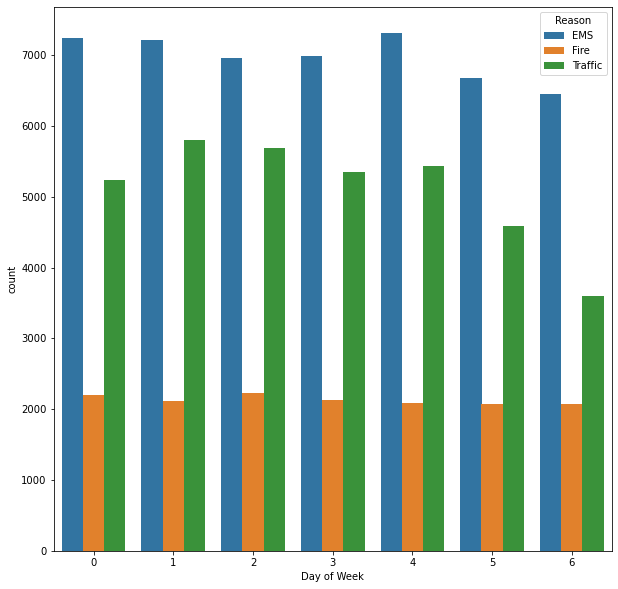

### Use map function to change the Day of Week from numbers to actual days and replot.

In [64]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['dayofweek'] = df['dayofweek'].map(dmap)

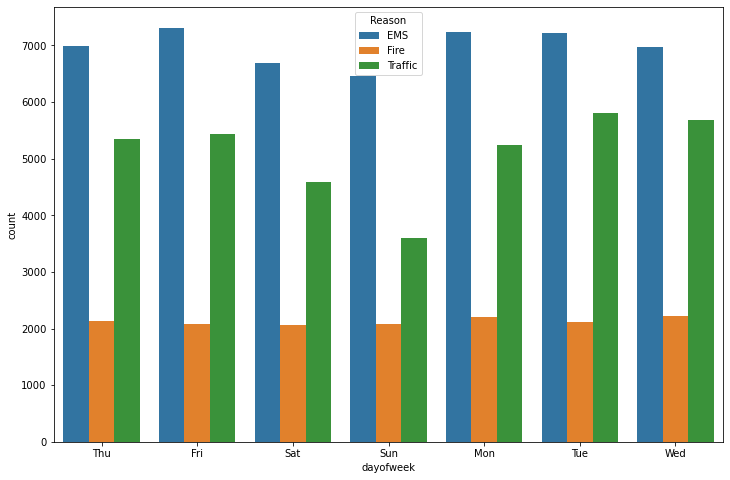

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='dayofweek', hue='Reason');

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

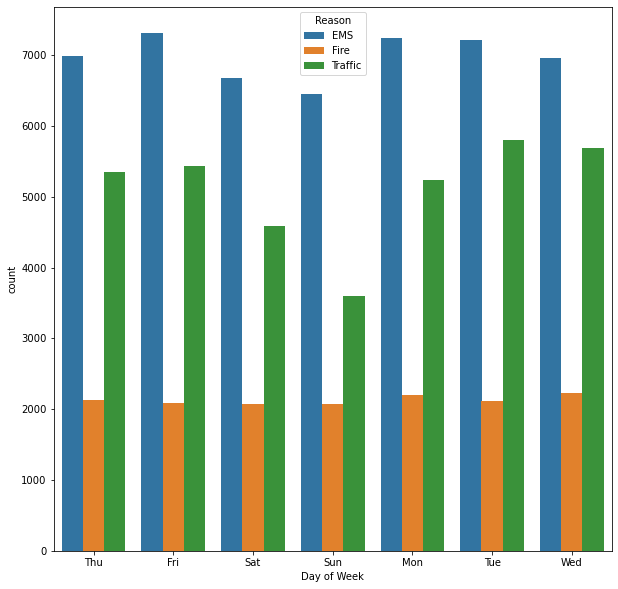

### Use seaborn to create a countplot of the Month column with the hue based off of the Reason column. 

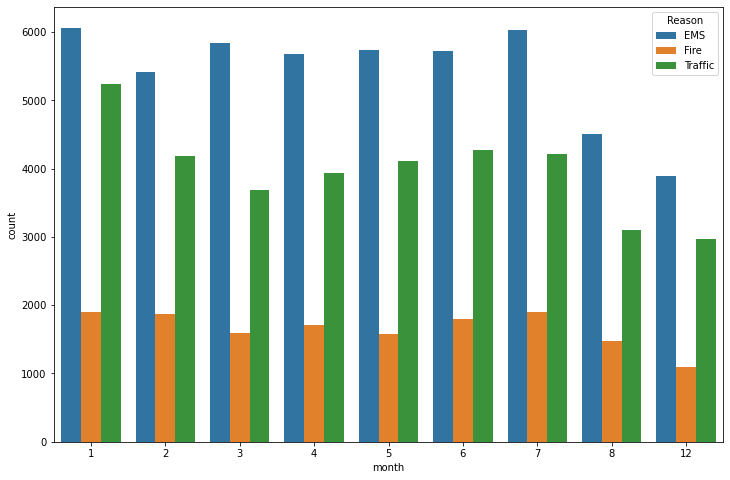

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='month', hue='Reason');

<AxesSubplot:xlabel='Month', ylabel='count'>

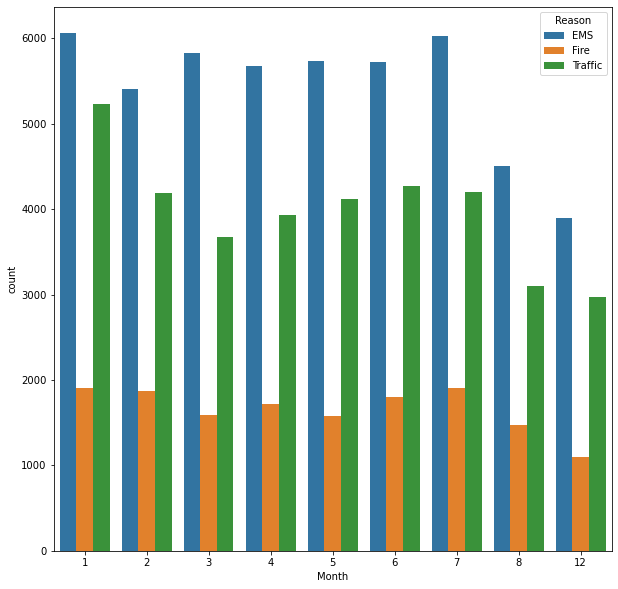

## Other data analysis

In [67]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


### Find the sum of the values for the Ages and Ratings

In [68]:
df[['Age','Rating']].sum()

Age       382.00
Rating     44.92
dtype: float64

In [38]:
df[['Age','Rating']].sum()

Age       382.00
Rating     44.92
dtype: float64

### Find the average age and rating

In [70]:
df[['Age','Rating']].mean()

Age       31.833333
Rating     3.743333
dtype: float64

Age       31.833333
Rating     3.743333
dtype: float64

### Find the standard deviation of age and rating

In [71]:
df[['Age','Rating']].std()

Age       9.232682
Rating    0.661628
dtype: float64

Age       9.232682
Rating    0.661628
dtype: float64

### Find the minimum of age and rating

In [72]:
df[['Age','Rating']].min()

Age       23.00
Rating     2.56
dtype: float64

Age       23.00
Rating     2.56
dtype: float64

### Find the maximum of age and rating

In [73]:
df[['Age','Rating']].max()

Age       51.0
Rating     4.8
dtype: float64

Age       51.0
Rating     4.8
dtype: float64

### Find the median of age and rating

In [74]:
df[['Age','Rating']].median()

Age       29.50
Rating     3.79
dtype: float64

Age       29.50
Rating     3.79
dtype: float64

### Find the mode of age

In [77]:
pd.DataFrame(df['Age'].mode())

,Age
0,23
1,25
2,30


,Age
0,23
1,25
2,30


### Find the value_counts() of age to check the frequency of each age.

In [78]:
df['Age'].value_counts()

25    2
23    2
30    2
26    1
29    1
34    1
40    1
51    1
46    1
Name: Age, dtype: int64

25    2
23    2
30    2
26    1
29    1
34    1
40    1
51    1
46    1
Name: Age, dtype: int64

### Use count plot of age to see the frequency of each age.

<AxesSubplot:xlabel='Age', ylabel='count'>

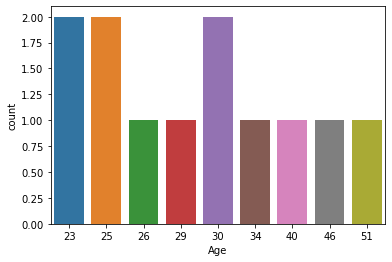

In [79]:
sns.countplot(data=df, x='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

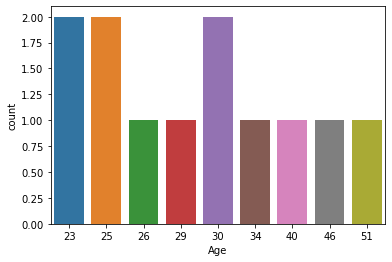

### Use histplot to see the distribution of ages and ratings.

<AxesSubplot:xlabel='Age', ylabel='Count'>

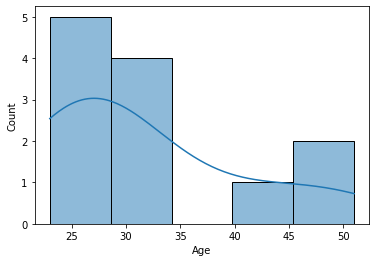

In [80]:
sns.histplot(data=df, x='Age', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

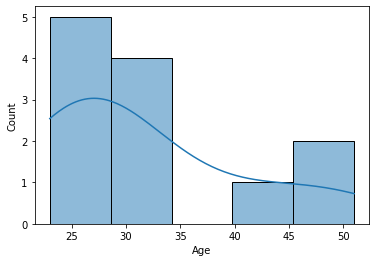

<AxesSubplot:xlabel='Rating', ylabel='Count'>

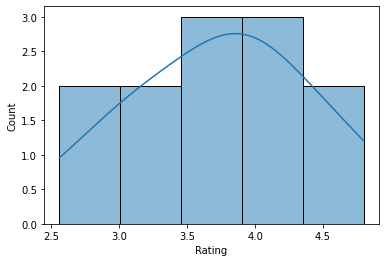

In [81]:
sns.histplot(data=df, x='Rating', kde=True)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

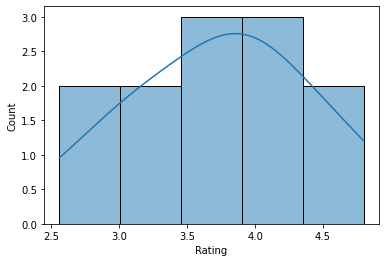

### Display the descriptive statistics of the dataframe

In [82]:
df.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


## Titanic Data Analysis
[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
##### Features:
- survival - Survival (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Read the Titanic.csv file into Pandas dataframe

In [253]:
df = pd.read_csv('Titanic - Titanic.csv')

In [254]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Display the info of the dataframe

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Display the descriptive statistics of the dataframe

In [143]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Perform pairplot of the dataframe

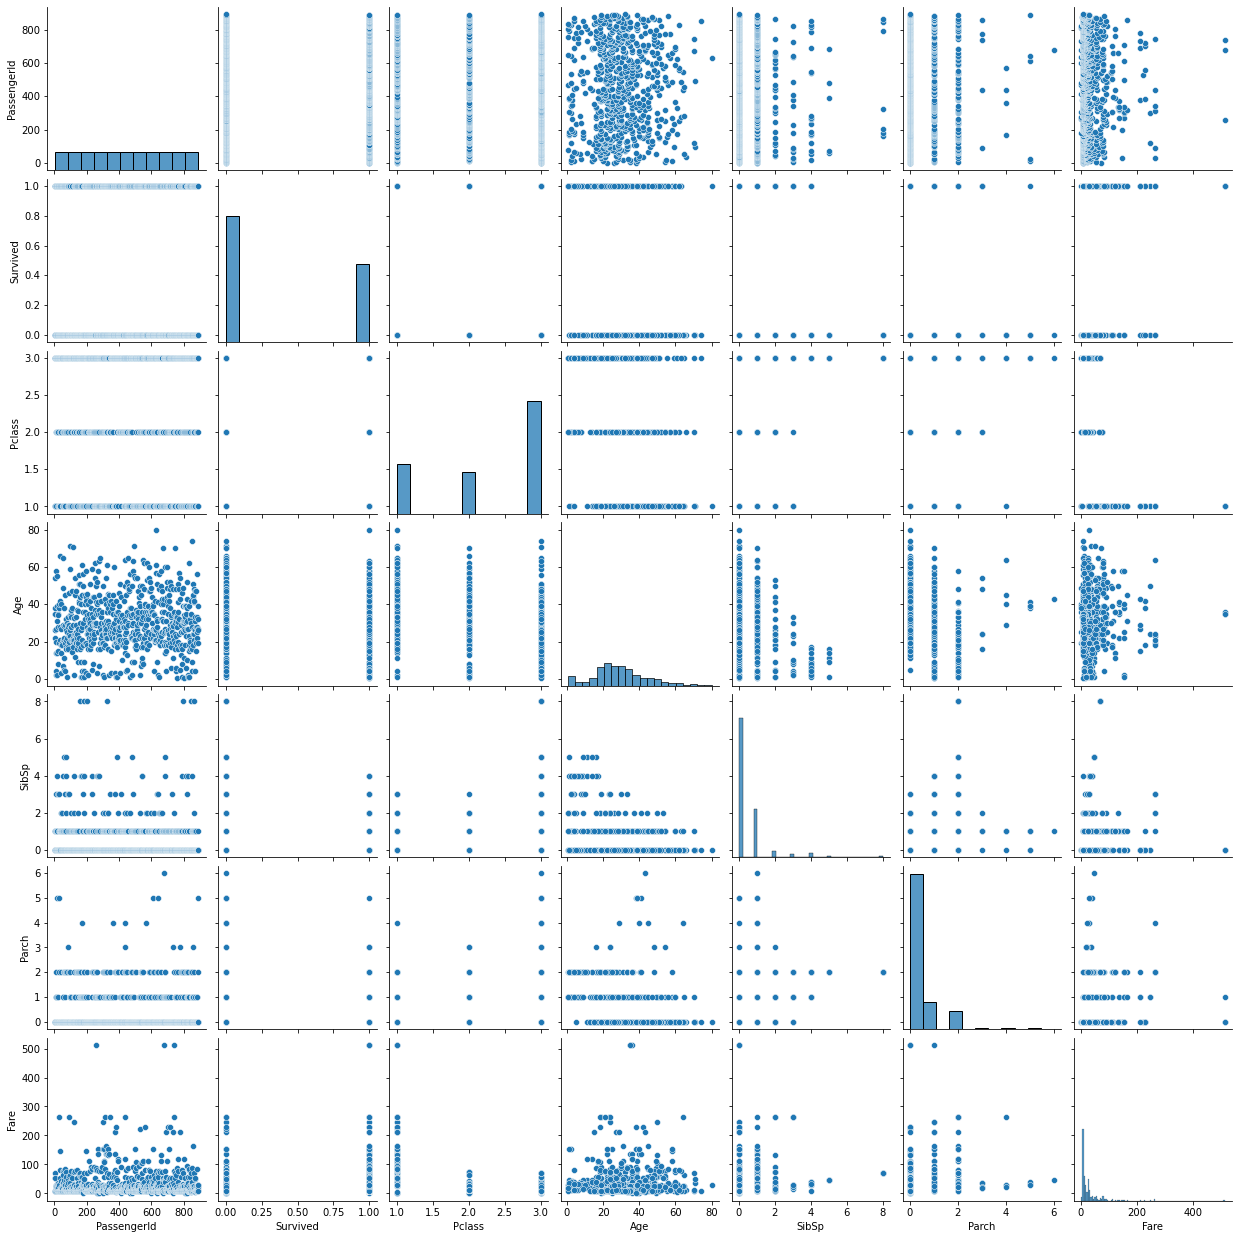

In [144]:
sns.pairplot(data=df)

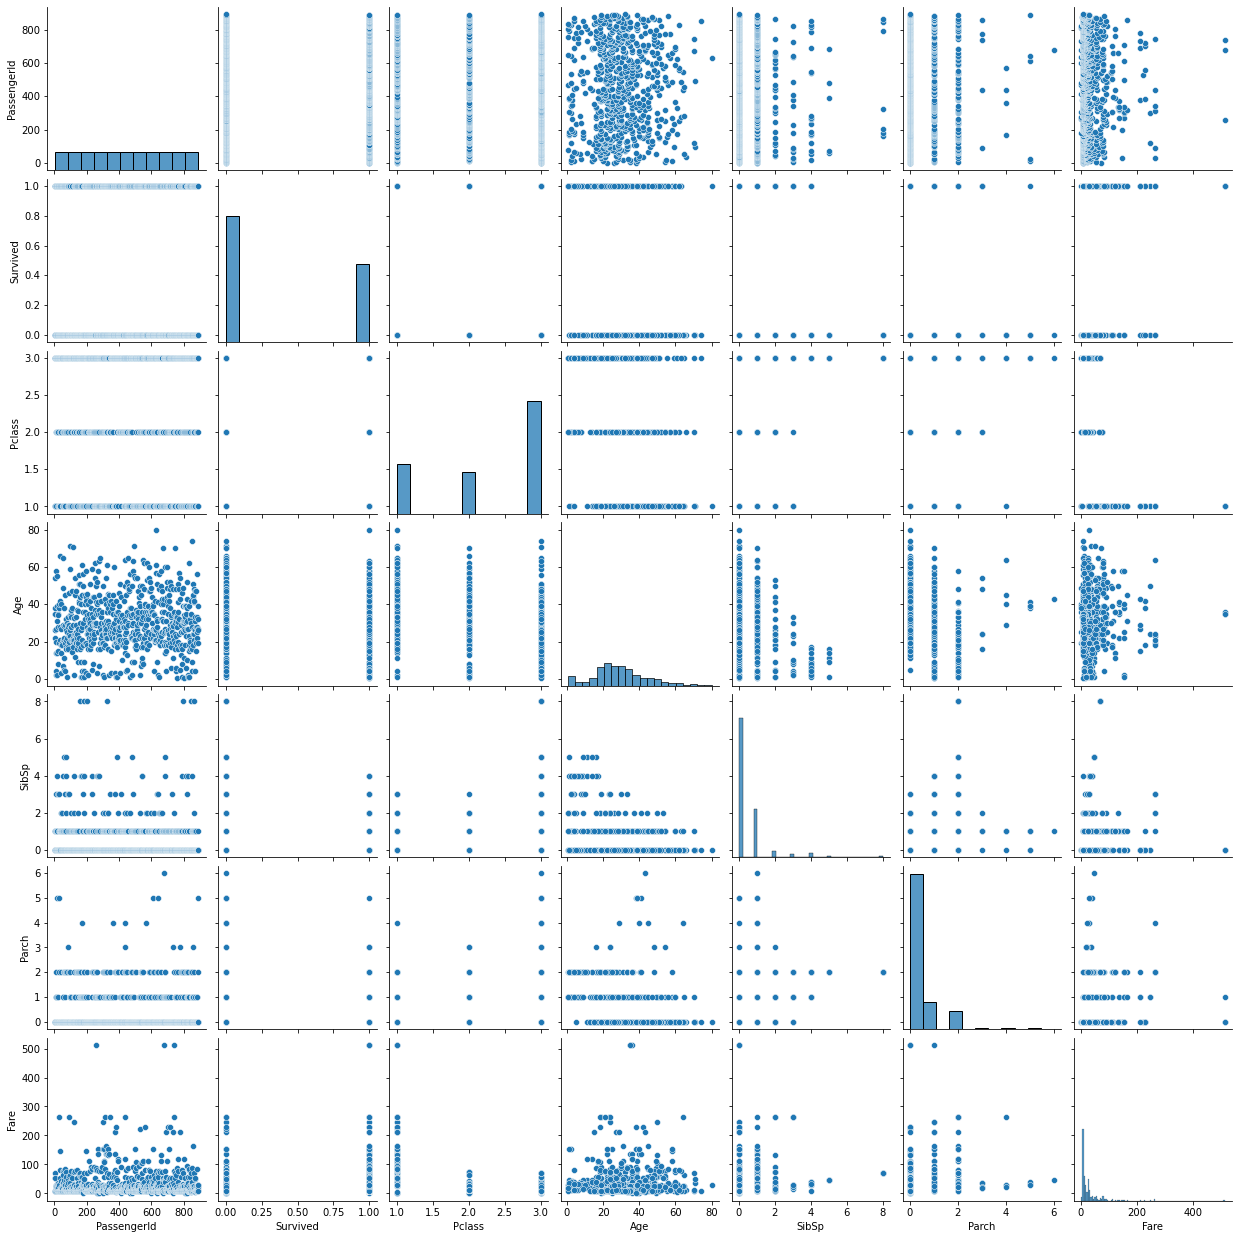

### Perform pairplot of the dataframe with hue='Survived'

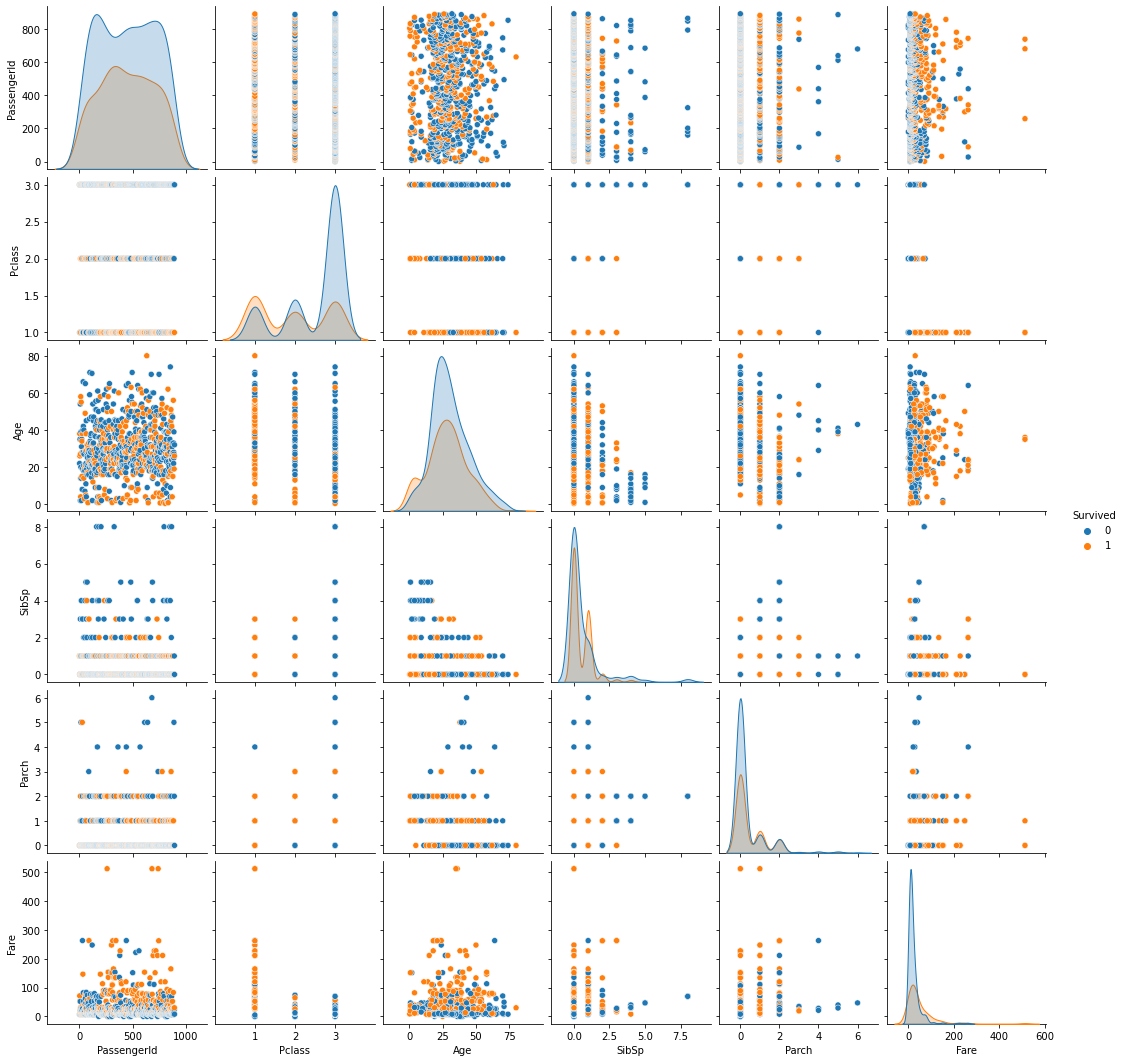

In [145]:
sns.pairplot(data=df, hue='Survived')

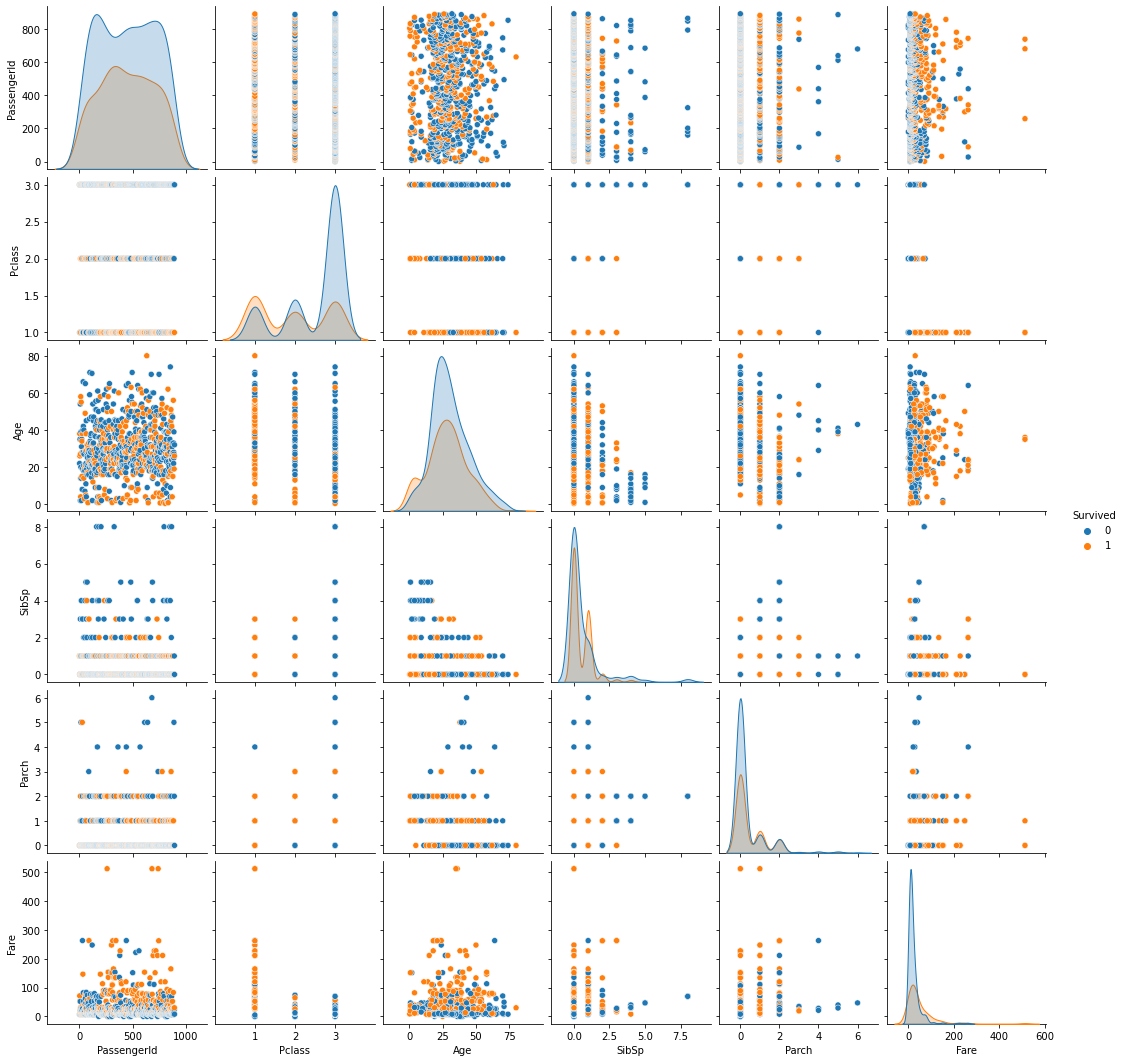

### Use pie chart to see the percentage of Survived/Unservived people

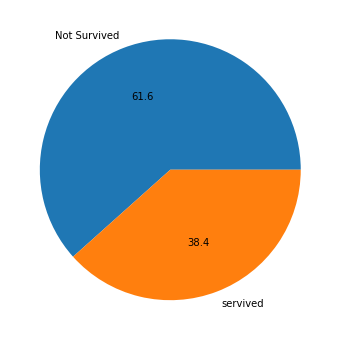

In [146]:
plt.figure(figsize=(8,6))
plt.pie(df['Survived'].value_counts().values, labels=['Not Survived', 'servived'],autopct='%0.1f');

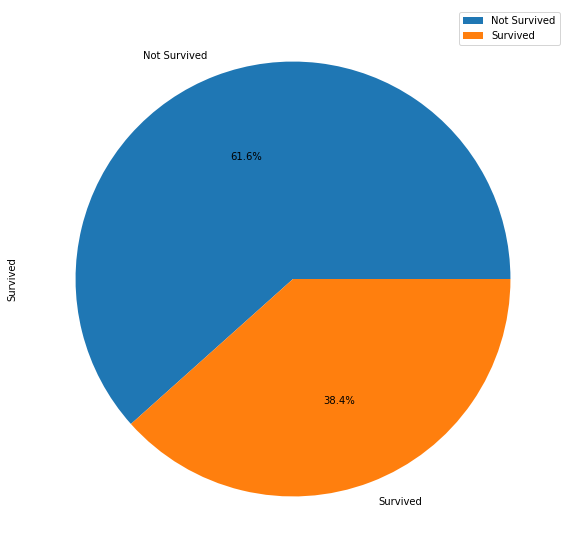

### Use pie chart to see the percentage of Passenger Class (Pclass)

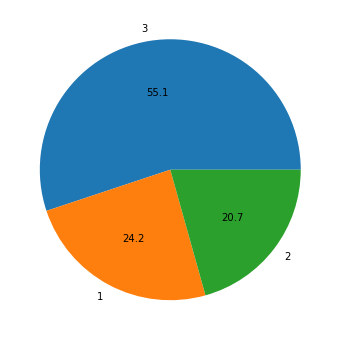

In [147]:
plt.figure(figsize=(8,6))
plt.pie(df['Pclass'].value_counts().values, labels=df['Pclass'].value_counts().index,autopct='%0.1f');

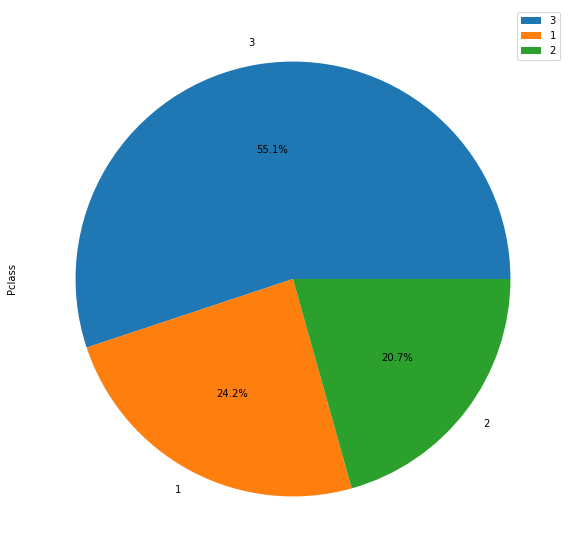

### Use count plot to display  how many people survived vs. unservived

<AxesSubplot:xlabel='Survived', ylabel='count'>

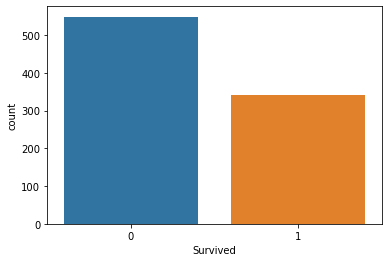

In [148]:
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

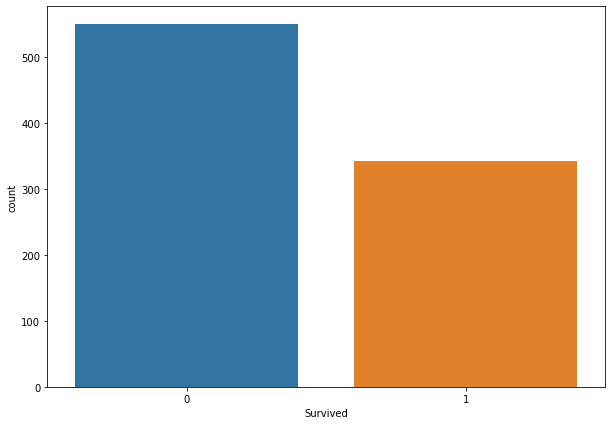

### Use count plot to display  how many people survived vs. unservived categorized by gender (sex)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

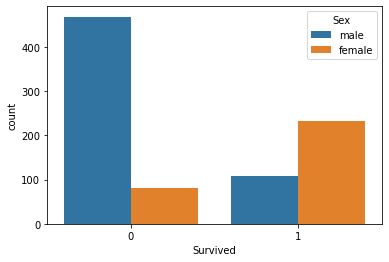

In [150]:
sns.countplot(data=df, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

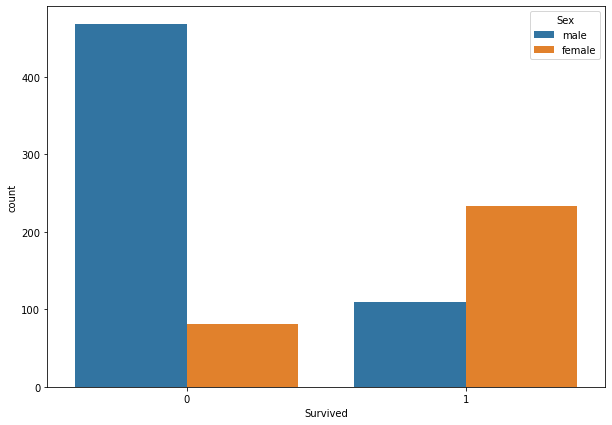

### Use count plot to display  how many people survived vs. unservived categorized by Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

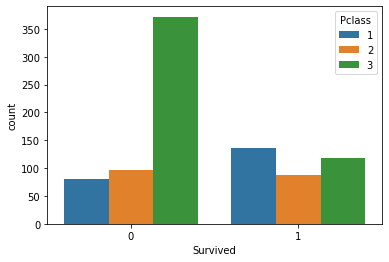

In [151]:
sns.countplot(data=df, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

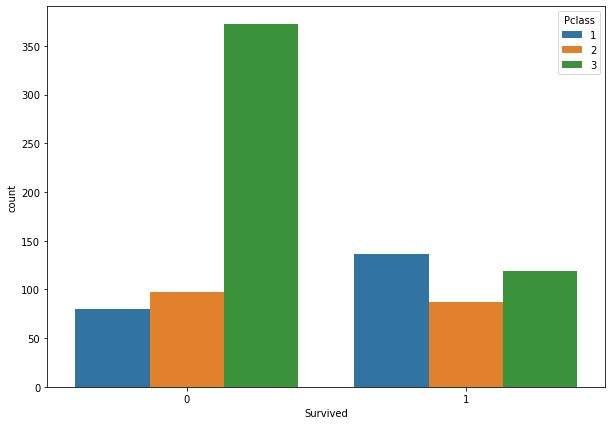

<AxesSubplot:xlabel='Age', ylabel='Count'>

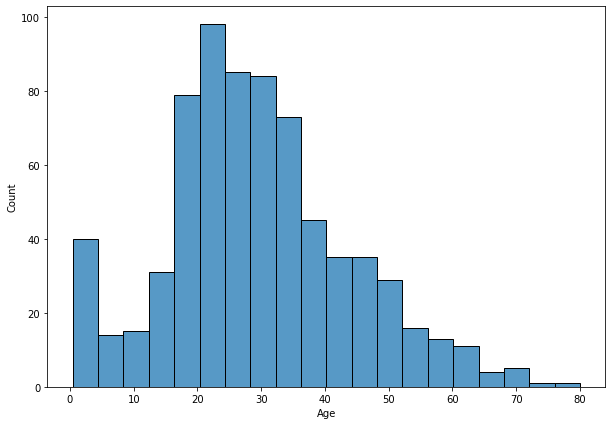

### Check the distribution of Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

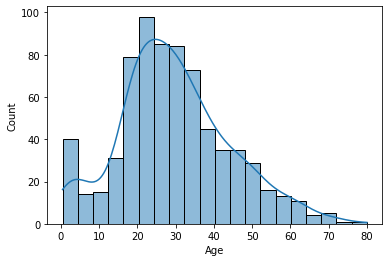

In [101]:
sns.histplot(data=df, x='Age', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

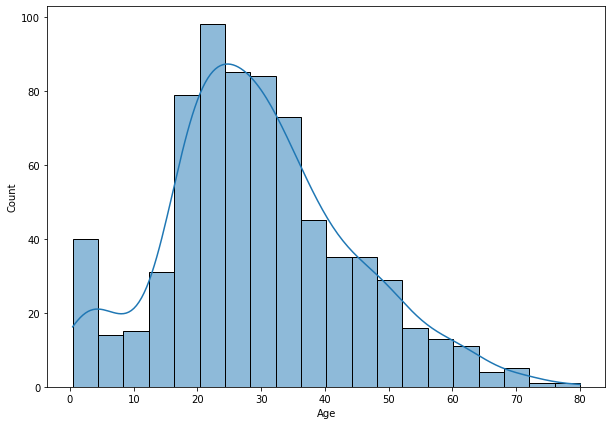

### Use box plot to display  the distribution of Age in each Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

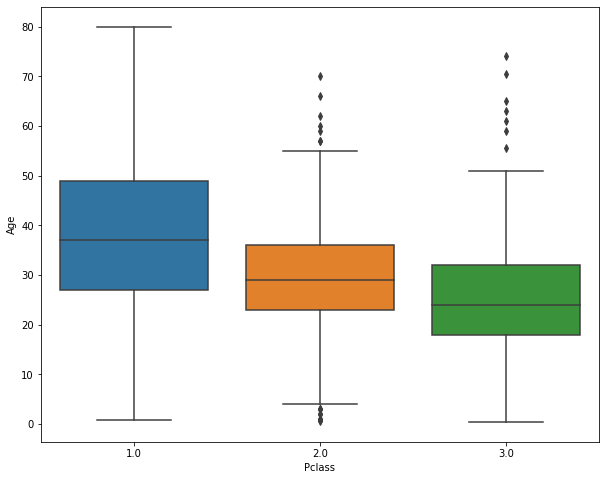

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

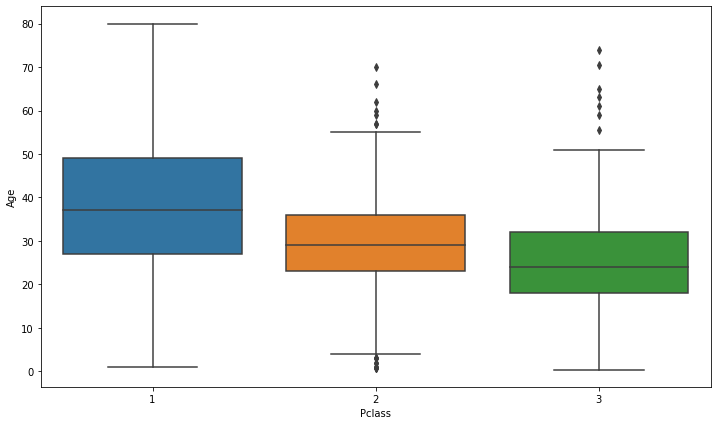

### Use box plot to display  the distribution of Age for survived/unservived passangers

<AxesSubplot:xlabel='Survived', ylabel='Age'>

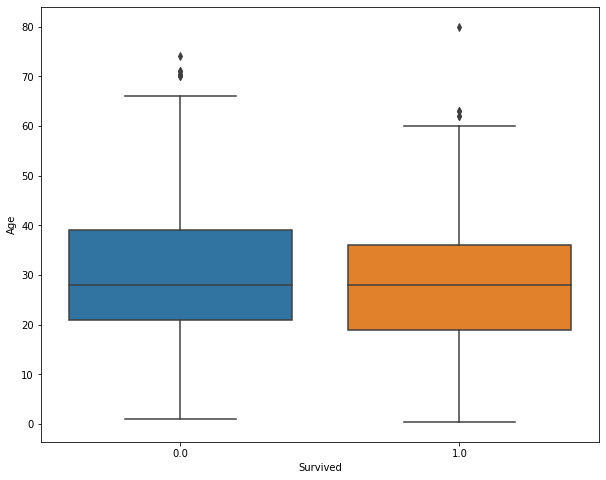

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

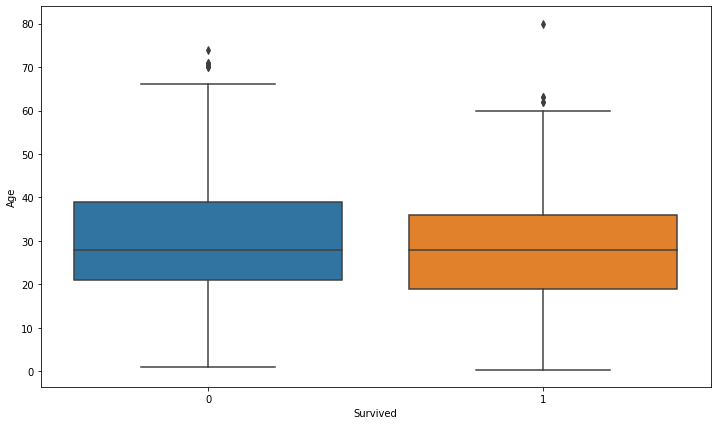

### Display the distribution of the ticket fare (Fare)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

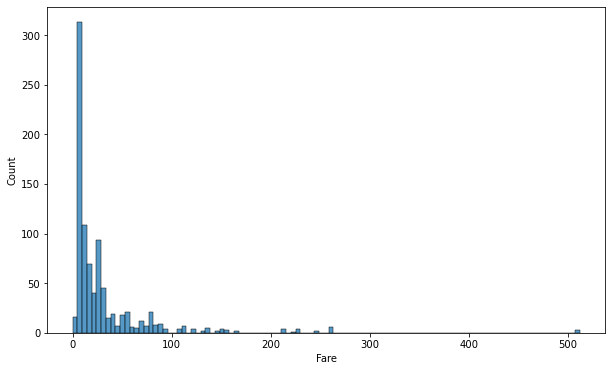

In [155]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

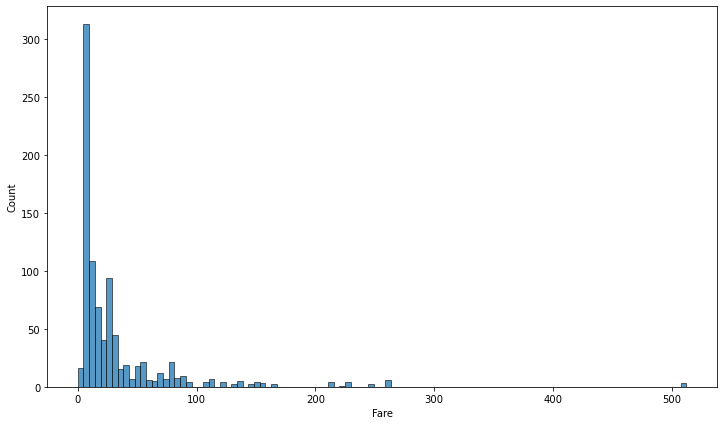

<AxesSubplot:xlabel='Fare', ylabel='Count'>

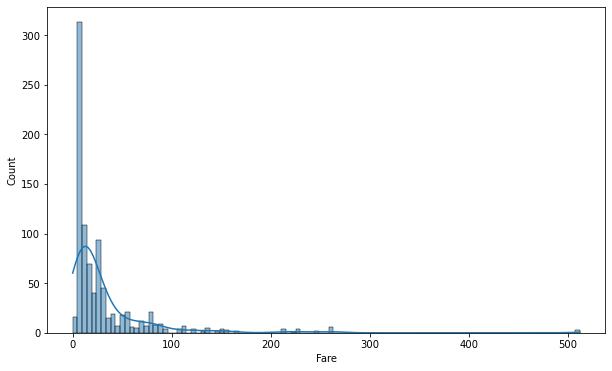

In [156]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

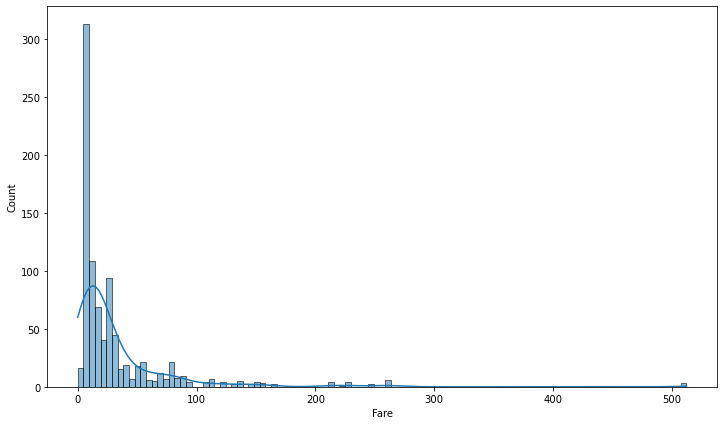

### Calculate the mean Fare

In [157]:
df.Fare.mean()

32.2042079685746

32.2042079685746

### Calculate the mode Fare

In [158]:
df.Fare.mode()

0    8.05
Name: Fare, dtype: float64

0    8.05
Name: Fare, dtype: float64

### Calculate the median Fare

In [159]:
df.Fare.median()

14.4542

14.4542

### Calculate the min,max and quartiles of Fare

In [161]:
df.Fare.quantile([0,0.25,0.5,0.75,1])

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

### Display the distribution of the ticket fare (Fare) with mean, mode, and median

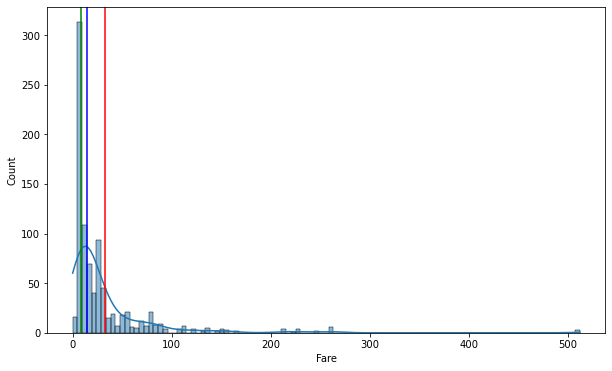

In [168]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', kde=True)
plt.axvline(df.Fare.mean(), color='r')
plt.axvline(df.Fare.median(), color='b')
plt.axvline(df.Fare.mode()[0], color='g');

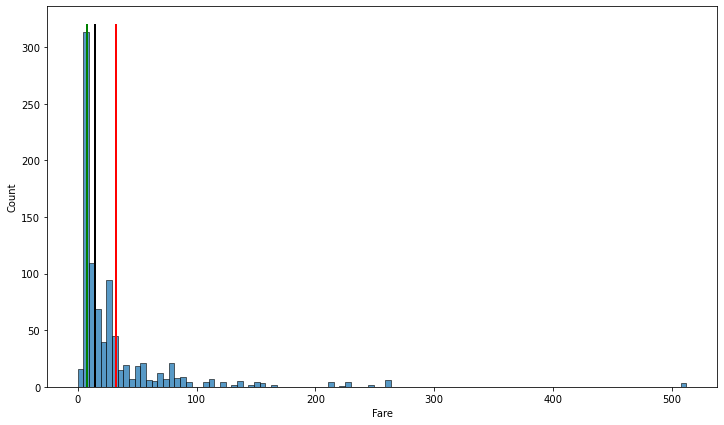

### Display the distribution of the ticket fare (Fare) with histplot and boxplot

<Figure size 720x720 with 0 Axes>

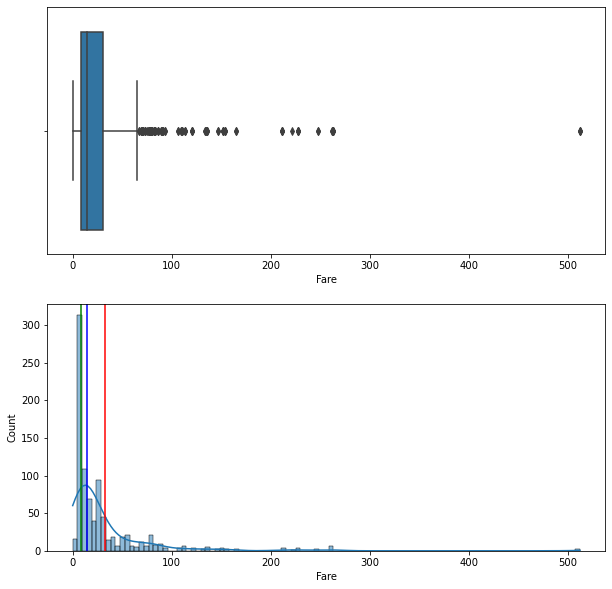

In [197]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.boxplot(data=df,x='Fare', ax=ax1)
sns.histplot(data=df, x='Fare', kde=True, ax=ax2)
plt.axvline(df.Fare.mean(), color='r')
plt.axvline(df.Fare.median(), color='b')
plt.axvline(df.Fare.mode()[0], color='g')
plt.show();

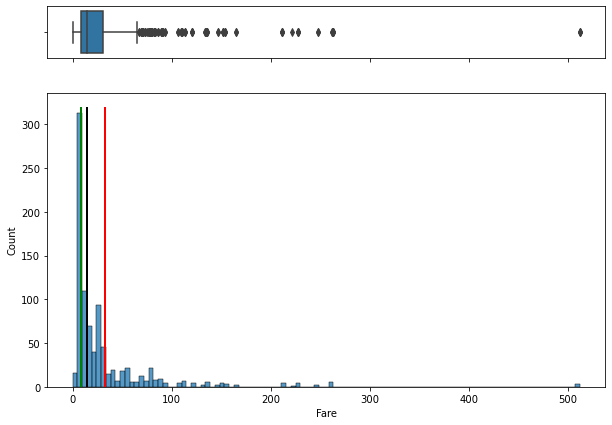

### Can you tell what kind of skewness of the Fare data?

In [76]:
# right skewed

### Use any technique to convert the skewed data to unskewed data and replot

In [255]:
from math import log
df['logFare'] = df['Fare'].apply(lambda x: np.log(x+1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


In [256]:
df.logFare.mean()

2.9622457416890775

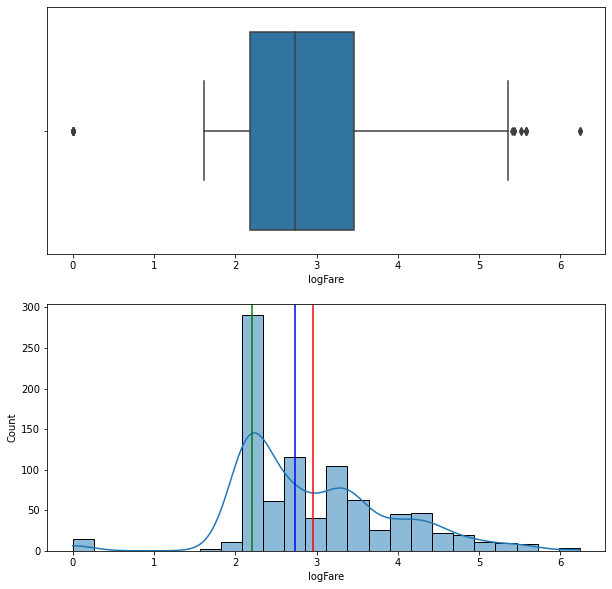

In [257]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.boxplot(data=df,x='logFare', ax=ax1)
sns.histplot(data=df, x='logFare', kde=True, ax=ax2)
plt.axvline(df.logFare.mean(), color='r')
plt.axvline(df.logFare.median(), color='b')
plt.axvline(df.logFare.mode()[0], color='g')
plt.show();